In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_flats = pd.read_csv("data_flats.csv",sep=';')
data_flats.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [3]:
data_flats.dtypes[data.dtypes == 'object']

NameError: name 'data' is not defined

## Создадим тестовый набор данных:

---
# Удаление пропусков
---


In [4]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4],
                          [0, 1, 2]], columns=['one', 'two', 'three'])

В данных часто бывают пропуски, в Pandas их можно найти с помощью метода .isna():

In [ ]:
test_data.isna()

В местах пропусков у нас появится значение True.

Столбцы или строки с пропусками мы можем удалить с помощью метода .dropna(). При axis=0 удаляются строки, при 1 — столбцы, по умолчанию значение равно 0:

In [ ]:
test_data.dropna(axis=0)

Удаление строк и столбцов — грубое решение, из-за этого можно случайно убрать нужные данные. Поэтому лучше заменять пропуски статистиками или константным значением с помощью метода fillna():

In [ ]:
test_data.fillna(-1)

Какими статистиками можно заменить пропуски:

среднее значение np.mean();

максимальное значение np.max();

минимальное значение np.min();

медиана np.median().

Для удобства некоторые методы можно вызвать прямо у столбцов.

---
# Нормализация данных
---


Некоторые алгоритмы обращают внимание на масштаб переменных - это помогает алгоритму (например, градиентному спуску) лучше сходиться. Для этого нужно делать нормализацию данных - приведение переменных к одному масштабу.
Кроме этого, если есть несколько наборов данных одной природы, но разного размера, их нужно нормализовать, чтобы иметь возможность сравнить влияние каких-то других признаков.
Несмотря на то, что некоторые алгоритмы работают независимо от масштаба признаков, хуже от нормализации обычно не становится.
Когда мы говорим о нормализации, мы говорим о числах.
Мы посмотрим на работу методов нормализации из библиотеки sklearn. На вход будем подавать pandas.DataFrame, на выходе будем получать np.ndarray. Информация о структуре pandas-таблицы теряется.

## minmax нормализация

Одним из стандартных способов нормализации является `minmax` нормализация.  
Данный вид нормализации приводит независимо каждый признак к значению между 0 и 1.  
Как это работает? Для каждого признака алгоритм находит минимальное ($x_{min}$) и максимальное ($x_{max}$) значение, после этого признак `x` трансформируется в $$x := \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

## std нормализация (стандартная нормализация)

Ещё один вид нормализации — std нормализация. Мы находим среднее значение для признака, затем стандартное отклонение, из каждого значения в текущем признаке вычитаем среднее значение для всего признака и делим на стандартное отклонение.

`std` нормализация (иначе называется `стандартная нормализация` или `zero mean, unit variance`) - еще один вид нормализации признаков.  
Как он работает? Для каждого признака алгоритм независимо находит среднее значение ($x_{mean}$) и стандартное отклонение ($x_{std}$), после этого признак `x` трансформируется в $$x := \frac{x - x_{mean}}{x_{std}}$$

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(test_data)

## Удаление ненужных строк и столбцов

Иногда в данных находятся признаки (столбцы), которые не несут никакой полезной информации или были считаны по ошибке.  
Их можно можно удалить с помощью метода `.drop(column_names, axis=1)`. В `columns` необходимо передать или название признака (столбца), или список названий признаков (столбцов):

In [ ]:
test_data.drop('one', axis=1)

In [ ]:
test_data.drop(['one', 'three'], axis=1)

Если в предыдущем методе в параметр axis передавать 0, метод будет удалять строки с номерами, которые вы передадите (или один номер, или список номеров):

In [ ]:
test_data.drop(0, axis=0)

In [ ]:
test_data.drop([0, 2], axis=0)

---
# Feature Engineering
---

Создание новых признаков - трудоемкий процесс, который позволяет значительно повысить точность модели при правильном использовании методов создания новых признаков. Самое большое повышение точности обычно случается после того, как Data Science разработчик погружается в предметную область задачи, потому что это позволяет создавать новые признаки осмысленно.
Несмотря на это, есть автоматические/полуавтоматические методы создания новых признаков, о которых мы поговорим ниже.
Для исследования темы создания новых признаков воспользуемся датасетом vis_data и дополним его новой информацией:

In [6]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("latlons.csv") # file with coordinates
vis_data = pd.concat([vis_data, latlons], axis=1)

## Ручное создание признаков

Ручное создание признаков требует погружения в предметную область задачи и не всегда гарантирует положительный результат.  
Часто данные приходят без пояснения и есть только сами табличные данные и, если повезет, названия признаков. Нам повезло. Посмотрим на данные и на названия признаков:

In [7]:
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,...,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"14512 sussex, Detroit MI",42.394657,-83.194265


In [ ]:
vis_data.columns

Судя по названию переменных, это данные о нарушителях, которые должны платить штраф за какое-то правонарушение.
Есть переменная compliance, которая принимает значения 0, 1 и None. Так как описания нет, мы можем предположить, что 0 - нарушитель заплатил штраф, 1 - не заплатил. Что в данном контексте означает None понять трудно, возможно, это пропуски, которые следует просто выбросить.
Кроме изначальных признаков нам также дали ширину и долготу. Также, есть признак city. Что можно сделать с таким набором признаков? Например, можно посмотреть расстояние от точки правонарушения до центра города, в котором произошло нарушение. Давайте сначала исследуем, какие города представлены в выборке:

In [8]:
# Можно посмотреть на value_counts, не ограничивая вывод, 
# чтобы увидеть, как много там разных значений
vis_data.city.value_counts()[:10]

DETROIT             136936
SOUTHFIELD           13436
Detroit              10496
detroit               4183
DEARBORN              3637
FARMINGTON HILLS      2329
OAK PARK              2216
WARREN                2000
DET                   1657
W. BLOOMFIELD         1635
Name: city, dtype: int64

Видно, что подавляюще большую часть значений составляет `DETROIT`. Также, чуть ниже видны `Detroit` и `detroit`.  
Название города с самым большим количеством нарушений записано по-разному в данных. Возможно, некоторые другие города тоже записаны в разном регистре.  

In [9]:
vis_data['city'] = vis_data['city'].apply(lambda x: x.lower())

In [10]:
vis_data['city'].value_counts()[:10]

detroit             151621
southfield           14760
dearborn              4017
farmington hills      2508
oak park              2432
warren                2150
det                   1928
livonia               1798
w. bloomfield         1795
redford               1718
Name: city, dtype: int64

Теперь мы более точно видим, что большинство преступлений (из представленных в выборке) совершается в Детройте.
Возможно, информативным признаком будет расстояние от места правонарушения до центра Детройта.
Теперь давайте найдем для каждого нарушения, для которого есть широта и долгота, его расстояние до центра Детройта со следующими координатами:

широта: 42.331429
долгота: -83.045753

In [11]:
from math import radians, sin, cos, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371 
    return c * earth_radius

vis_data['distance'] = vis_data.apply(lambda row: 
                                      haversine(lon1 = -83.045753, 
                                                lat1 = 42.331429,
                                                lon2 = row['lon'], 
                                                lat2 = row['lat']), 
                                      axis=1)

In [ ]:
vis_data.head()

In [ ]:
vis_data['distance'][vis_data['distance'] < 100].hist(bins=100);

## Создание полиномиальных признаков

Теперь рассмотрим более механические и менее интеллектуальные способы создать признаки. Новые признаки можно создавать, просто перемножением и делением старых признаков друг на друга.  
Кроме этого, можно брать один признак и возводить его, например, в квадрат или брать из него корень. То есть, в более общем виде, можно создать новый признак из старого, возведя все значения старого признака в дробную степень.

In [12]:
from sklearn.preprocessing import PolynomialFeatures

Класс `PolynomialFeatures` из библиотеки `sklearn` принимает на вход набор признаков и на выходе отдает полиномиальные признаки, сгенерированные на основе входных и со степенью меньше либо равной указанной.  
Например, для признаков `[a, b]` и степени `2` он вернет `[1, a, b, a^2, ab, b^2]`.

In [13]:
pf = PolynomialFeatures(2)
poly_features = pf.fit_transform(vis_data[['balance_due','payment_amount']])

In [14]:
poly_features

array([[1.0000e+00, 3.0500e+02, 0.0000e+00, 9.3025e+04, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.5000e+01, 7.8000e+02, 5.6250e+03, 5.8500e+04,
        6.0840e+05],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [15]:
vis_data[['balance_due','payment_amount']]

,balance_due,payment_amount
0,305.0,0.0
1,75.0,780.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
250301,0.0,0.0
250302,0.0,0.0
250303,0.0,0.0
250304,0.0,0.0


## Dummy-переменные

Когда мы говорим о категориальных признаках, есть два основных случая:
 - Категориальный признак содержит строки, никакая модель не примет их на вход, потребуется некоторое преобразование
 - Категориальный признак содержит числа. В таком случае, в принципе, можно никак не трогать этот признак, но это будет неправильно с точки зрения логики обучения модели.
 
Рассмотрим второй случай: есть признак "тип животного", который принимает `n` различных значений: значение 0, если животное - кошка, 1 - если тигр, 2 - если пантера. В отличие от `continuous` признаков, то есть, имеющих некоторый порядок, категориальные признаки такого порядка не имеют - мы не можем строго сравнить тигра и пантеру, это просто разные сущности. Некоторые алгоритмы могут работать с категориальными признаками, некоторые - нет.  
Естественной предобработкой для таких признаков является создание dummy-переменных на основе категориального признака, то есть, создание `n` признаков-индикаторов. Каждый из индикаторов равен 1 тогда, когда в изначальном примере выбрано соответствующее значение и 0 иначе. 
 

Преобразуем признак `state` в dummy-переменные и посмотрим его `shape`:

In [16]:
pd.get_dummies(vis_data.state).shape

(250306, 59)

Теперь преобразуем признак city в dummy-переменные. Для этого сначала требуется сделать небольшую предобработку, чтобы сократить количество уникальных значений в этом признаке. Для начала, найдем города, которые описывают большинство (90%) примеров:

In [19]:
cities_with_freqs = list(vis_data.city.value_counts())
cities_with_freqs

[151621,
 14760,
 4017,
 2508,
 2432,
 2150,
 1928,
 1798,
 1795,
 1718,
 1626,
 1230,
 1133,
 971,
 949,
 948,
 930,
 903,
 826,
 809,
 803,
 778,
 766,
 760,
 751,
 747,
 746,
 677,
 641,
 636,
 609,
 605,
 600,
 593,
 579,
 568,
 555,
 519,
 513,
 510,
 506,
 486,
 470,
 460,
 453,
 453,
 451,
 433,
 431,
 430,
 425,
 424,
 418,
 401,
 371,
 344,
 343,
 334,
 333,
 325,
 315,
 315,
 298,
 296,
 285,
 276,
 272,
 270,
 262,
 261,
 251,
 248,
 246,
 242,
 242,
 234,
 227,
 225,
 222,
 217,
 216,
 215,
 215,
 198,
 198,
 197,
 197,
 192,
 191,
 185,
 183,
 178,
 178,
 178,
 177,
 175,
 173,
 164,
 162,
 156,
 155,
 153,
 152,
 150,
 147,
 147,
 144,
 144,
 143,
 142,
 141,
 140,
 137,
 137,
 130,
 128,
 128,
 127,
 126,
 121,
 120,
 119,
 115,
 114,
 113,
 113,
 111,
 111,
 109,
 109,
 108,
 107,
 106,
 104,
 104,
 100,
 96,
 95,
 92,
 91,
 91,
 89,
 87,
 84,
 84,
 84,
 83,
 83,
 82,
 82,
 81,
 80,
 79,
 79,
 79,
 78,
 78,
 78,
 78,
 78,
 76,
 76,
 76,
 75,
 74,
 74,
 73,
 72,
 71,
 71

In [18]:
top_cities_count = int(np.percentile(cities_with_freqs,90))
top_cities_count

14

Теперь оставим только этот топ городов, остальные города назовем other:

In [20]:
all_cities = vis_data.city.value_counts().index
top_cities = list(all_cities)[:top_cities_count]
cities_to_throw_away = list(set(all_cities) - set(top_cities))
# vis_data.loc[vis_data['city'].isin(cities_to_throw_away),
#              'city'] = 'other'

In [21]:
cities_to_throw_away

['littleton',
 'memphis',
 'gross pte. park',
 'mt dora',
 'midland',
 'astoria',
 'bioomfield hills',
 'westland',
 'melbourne',
 'lambertville',
 'grosse ponte pk',
 'gilroy',
 'hazelwood',
 'soithfield',
 'lake charles',
 'cave cree',
 'simi  vally',
 'wheat ridge',
 'southfiield',
 'bridgeton',
 'lincoln pk.',
 'wayandotte',
 'organge',
 'morristown',
 'bearstown',
 'wichita',
 'farmingtonhills',
 'rochester',
 'charest',
 'arvada',
 'ft. washiongton',
 'maudlin',
 'covington,',
 'lothrop village',
 'newkirk',
 'hazell park',
 'buckeye',
 'lathrup vil;lage',
 'livoania',
 'playa del rey',
 'lakeland',
 'sfld',
 'mendota  hts.',
 'cincinti',
 'santa fe',
 'w. fremont',
 'cottonwood heights',
 'san digo',
 'inkster rd.',
 'brownstown twp',
 'flossmore',
 's. rochwood',
 'onondaga',
 'lilhonia',
 'taylow',
 'lakeway',
 'de moines',
 'holt',
 'ecourse',
 'saline',
 'perrington',
 'jeddo',
 'brooklyn park',
 'lorton',
 'sullivan',
 'xxxx',
 'melbourne village',
 'warrn',
 'el cajon',
 '

Теперь количество уникальных значений в признаке city сократилось до:

In [ ]:
len(vis_data.city.value_counts())

## Работа с датой/временем

`Pandas` поддерживает работу с датами.  
[Больше про работу с временем в pandas](https://codeburst.io/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f)  
Выберем признак, содержащий время, уберем пропуски и преобразуем его в специальный формат для работы со временем:

In [ ]:
datetime_vals = pd.to_datetime(vis_data.payment_date.dropna())

In [ ]:
datetime_vals.head()

Теперь к этим значениям можно обращаться для определения дня, месяца или года:

In [ ]:
datetime_vals[1].month

Кроме этого, можно вытаскивать такие признаки, как день недели:

In [ ]:
datetime_vals[1].weekday()

Отсчет начинается с понедельника и с нуля, поэтому мы понимаем, что это четверг.
Почему это может быть важным признаком? Например, в текущем наборе данных можно использовать такой признак как будний день/выходной, чтобы определить, когда чаще совершают правонарушения:

In [ ]:
dt_issued_date = pd.to_datetime(vis_data.ticket_issued_date)
vis_data['is_weekend'] = dt_issued_date.dt.weekday>4
vis_data['wd'] = dt_issued_date.dt.weekday
vis_data.head(10)

---
# Задачи
---


In [ ]:
df_compl = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [ ]:
df_compl.head()

In [ ]:
df_compl.info()

In [ ]:
missing_data = df_compl.isna().sum()[df_compl.isna().sum()>0].reset_index()

In [ ]:
missing_data

 Затем найдите значение, которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся признак в переменную result.

In [ ]:
df_compl['state'] = df_compl['state'].fillna(df['state'].value_counts().index[0])

In [ ]:
result = df_compl['state'].value_counts().index[0]
df_compl['state'] = df_compl['state'].fillna(result)

In [ ]:
result

In [ ]:
# V2
state = df_compl['state'].value_counts().index[0]
result = df_compl['state'].fillna(state)


Продолжим готовить к анализу наш Data set, посвященный квартирам, выставленным на продажу. Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов, и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение. Поступим здесь таким образом. Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные. Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

In [ ]:
data_flats = data_flats.dropna()

In [ ]:
data_flats.info()

Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации. Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). В качестве ответа укажите минимальное значение в получившемся нормализованном признаке. Ответ округлите до 5 знаков после запятой.

In [ ]:
data = np.reshape(np.array(df_compl.balance_due),(-1,1))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ballance = sc.fit_transform(data)
ballance.min()

Загрузите данные train.csv, найдите признак, обозначающий баланс. Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих значений.

In [ ]:
#data = np.reshape(np.array(df_compl.balance_due),(-1,1))

In [ ]:
data = df_compl[df_compl['balance_due']>0].reset_index()
a = data['balance_due']**0.5
median = a.median()
mean = a.mean()
median-mean

Вернемся к первичному анализу наших данных по квартирам, выставленным на продажу. Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах : "Лефортово", "Перово", "Басманное" и "Богородское". Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать визуализацию с помощью боксплотов. Постройте боксплоты для распределения цен по этим районами (должно получиться четыре боксплота - по одному для каждого района). На основании полученных диаграмм ответьте на вопросы ниже.

In [ ]:
# data_flats.groupby('sub_area')['price_doc'].sum().reset_index()

df = data_flats[(data_flats['sub_area'] == 'Lefortovo') | (data_flats['sub_area'] == 'Perovo') | (
    data_flats['sub_area'] == 'Basmannoe') | (data_flats['sub_area'] == 'Bogorodskoe')]

plt.figure(figsize=(15, 10))
sns.boxplot(x = 'sub_area', y = 'price_doc',data = df)
plt.title('variable distribution\n', fontsize=15)

Загрузите данные train.csv, найдите признак, обозначающий баланс и признак, обозначающий размер скидки. Создайте полиномиальные признаки степени 3. Посчитайте среднее значение для каждого получившегося признака. В качестве ответа укажите номер признака, который содержит максимальное среднее значение.

In [ ]:
df_compl.columns
# 'discount_amount'
# 'balance_due'

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(3) #degree is 3
poly_feat = pd.DataFrame(pf.fit_transform(df_compl[['discount_amount','balance_due']])) # create new features and df
poly_feat['mean'] = poly_feat.mean(axis=1) # compute mean for feature
df = pd.concat([df_compl,poly_feat],axis=1) #concat old df and df with polyfeatures
df[df['mean'] == df['mean'].max()]['ticket_id'].reset_index()

In [ ]:
poly_feat[5].mean()

Загрузите данные train.csv, найдите признак, обозначающий дату, когда был выписан штраф. Найдите, сколько раз штраф был выписан на выходных и запишите это число в качестве ответа.

In [ ]:
# ticket_issued_date
df_compl['ticket_issued_date'] = pd.to_datetime(df_compl['ticket_issued_date'])
df_compl['weekday'] = df_compl['ticket_issued_date'].dt.weekday
#df_compl.groupby(['weekday']).agg(sum)
df_compl['weekday'].value_counts()[6] +df_compl['weekday'].value_counts()[5]


Ранее мы уже выяснили, что данные о квартирах не все числовые. Есть и признаки, которые содержат текстовые значения : ординальный (уровень экологии) и категориальный (район). Нам обязательно нужно перекодировать эти признаки, так как иначе мы не сможем в дальнейшем работать с этим датасетом и применять на нем какие-то математические алгоритмы. 

Ординальный признак мы можем перекодировать в числовой довольно простым способом: просто заменить каждое значение на число (4 - 'excellent', 3 - 'good' etc.).

Для этого необходимо:

 создать словарь, сопоставляющий числовые значения от 0 до 4 описанию экологии от 'no data' до 'excellent' соответственно
 заменить значения в колонке ecology на заданные нами выше с помощью метода .replace :

In [ ]:
ecology_dict = {"no data": 0,
               "poor": 1,
               "satisfactory": 2,
               "good" :3,
               "excellent":4}
data_flats['ecology'] = data_flats['ecology'].replace(to_replace=ecology_dict)

In [ ]:
data_flats['ecology'].mean()

Теперь необходимо разобраться с переменной, содержащей информацию о районе.  Для этого воспользуйтесь методом get_dummies

In [ ]:
pd.get_dummies(data_flats.sub_area)

Загрузите данные train.csv, найдите признак, обозначающий баланс. Уберите пропуски из этого признака и найдите выбросы с помощью межквартильного расстояния. Найдите модуль разницы между минимальным и максимальным выбросом.

In [ ]:
df_compl['balance_due'].isna().count()

In [ ]:
sns.boxplot(df_compl['balance_due'].values)

In [ ]:
IQR = df_compl['balance_due'].quantile(0.75) - df_compl['balance_due'].quantile(0.25)
perc25 = df_compl['balance_due'].quantile(0.25)
perc75 = df_compl['balance_due'].quantile(0.75)
df_compl['balance_due'] = df_compl.loc[df_compl['balance_due'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]


In [ ]:
sns.boxplot(df_compl['balance_due'])

In [ ]:
df_compl['balance_due'].max() #- df_compl['balance_due'].min()

In [4]:
from math import radians, sin, cos, asin, sqrt

In [5]:
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371 
    return c * earth_radius

vis_data['distance'] = vis_data.apply(lambda row: 
                                      haversine(lon1 = -83.045753, 
                                                lat1 = 42.331429,
                                                lon2 = row['lon'], 
                                                lat2 = row['lat']), 
                                      axis=1)

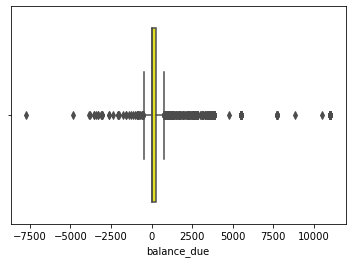

In [6]:
sns.boxplot(vis_data.balance_due,color='yellow')

In [7]:
vis_data.balance_due.max()

11030.0

In [8]:
vis_data.balance_due.min()

-7750.0

In [9]:
vis_data.balance_due.value_counts()

0.0       111510
305.0      67281
85.0       14092
140.0       9324
250.0       8967
           ...  
8.8            1
555.0          1
100.2          1
272.3          1
3550.0         1
Name: balance_due, Length: 606, dtype: int64

In [ ]:
#def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

In [ ]:
#o = outliers_iqr(vis_data.balance_due.dropna())

In [ ]:
#len(o)

In [17]:
IQR = vis_data['balance_due'].quantile(0.75) - vis_data['balance_due'].quantile(0.25)
perc25 = vis_data['balance_due'].quantile(0.25)
perc75 = vis_data['balance_due'].quantile(0.75)
df_math = vis_data.loc[vis_data['balance_due'].between(
perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [24]:
df_math['balance_due'].max() - df_math['balance_due'].min()

1201.3

In [21]:
df_math['balance_due'].min()

-448.0

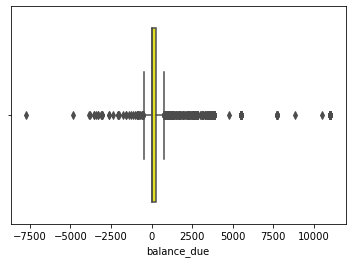

In [22]:
sns.boxplot(vis_data.balance_due,color='yellow')

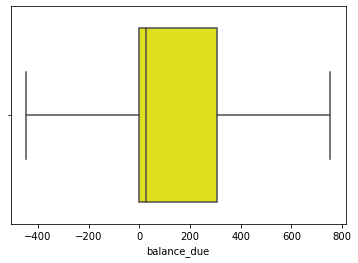

In [23]:
sns.boxplot(df_math.balance_due,color='yellow')

In [11]:
ys = vis_data.balance_due.dropna().values
quartile_1, quartile_3 = np.percentile(ys, [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
a = np.where((ys > upper_bound) | (ys < lower_bound),ys,0)
df = pd.DataFrame(a)
df = df[df[0] != 0]
print(df[0].max() - df[0].min())

18780.0
